In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Step 2: Load dataset
file_path = r"C:\Users\91917\Downloads\Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [3]:
# Check for missing values
print(df.isnull().sum())

# Basic info
print(df.info())

# Summary statistics
print(df.describe())

# Drop rows with missing values (if any)
df.dropna(inplace=True)


Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), obje

In [9]:
# Encode 'Gender' and 'Disease' columns
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Disease'] = le.fit_transform(df['Disease'])

# Encode target column (Outcome Variable)
df['Outcome Variable'] = le.fit_transform(df['Outcome Variable'])


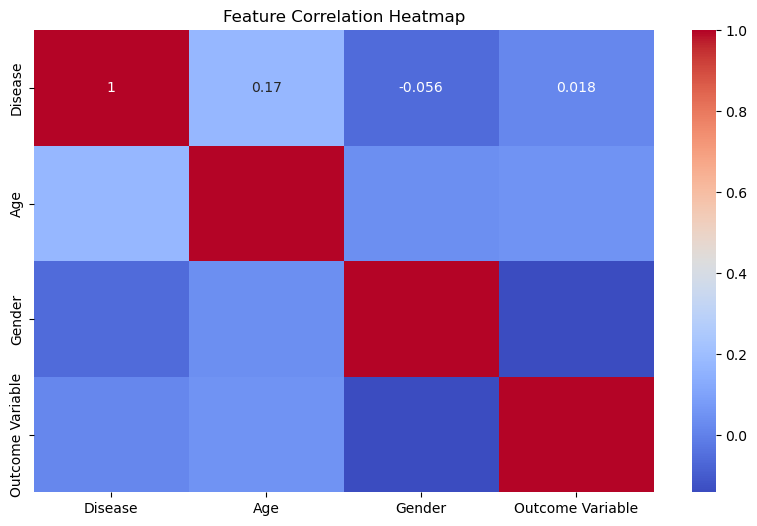

In [11]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Convert all object columns to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])


In [17]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of X
X_numeric = X.copy()

# Encode object columns
for col in X_numeric.columns:
    if X_numeric[col].dtype == 'object':
        X_numeric[col] = LabelEncoder().fit_transform(X_numeric[col])

# Check types
print(X_numeric.dtypes)


Disease                 int64
Fever                   int32
Cough                   int32
Fatigue                 int32
Difficulty Breathing    int32
Age                     int64
Gender                  int64
Blood Pressure          int32
Cholesterol Level       int32
dtype: object


In [18]:
print(X_numeric.isnull().sum())
print(y.isnull().sum())

# If any, fill with 0
X_numeric.fillna(0, inplace=True)
y.fillna(0, inplace=True)


Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
dtype: int64
0


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # ✅ Use scaled or numeric X_train


RandomForestClassifier(random_state=42)

Accuracy: 0.7714285714285715
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.77      0.81      0.79        37

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



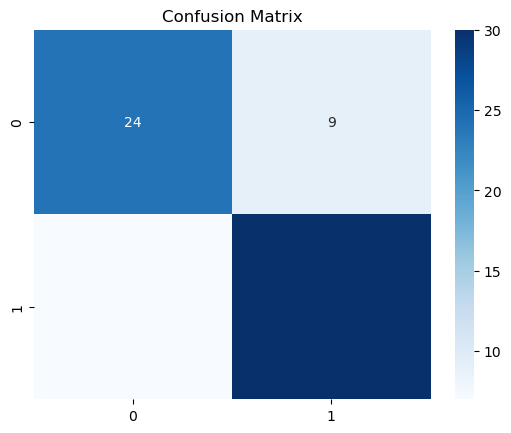

In [22]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.7714285714285715

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.77      0.81      0.79        37

    accuracy                           0.77        70
   macro avg       0.77      0.77      0.77        70
weighted avg       0.77      0.77      0.77        70



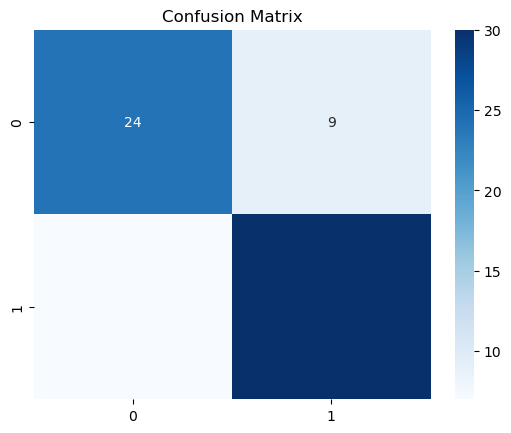

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [24]:
# Example: predict for new input
new_patient = pd.DataFrame({
    'Disease': [1],
    'Fever': [1],
    'Cough': [0],
    'Fatigue': [1],
    'Difficulty Breathing': [1],
    'Age': [45],
    'Gender': [1],
    'Blood Pressure': [130],
    'Cholesterol Level': [200]
})

new_patient_scaled = scaler.transform(new_patient)
prediction = model.predict(new_patient_scaled)
print("Predicted Outcome:", le.inverse_transform(prediction))


Predicted Outcome: ['High']


In [25]:
import joblib
joblib.dump(model, 'healthcare_diagnosis_model.pkl')


['healthcare_diagnosis_model.pkl']